In [141]:
import pandas as pd
import numpy as np

import matplotlib
# %matplotlib inline
from pylab import *

import geopandas as gpd
from pprint import pprint
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
file_dir = '/Users/tianyiyang/Downloads/TeamConflict/'
conflict_data_total = pd.read_csv(file_dir+'conflict_data_acled_2018_2021.csv')

In [56]:
conflict_data_total.shape

(680212, 31)

In [129]:
file = conflict_data_total[conflict_data_total['country']=='United Kingdom']

In [78]:
conflict_data_total.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [83]:
np.unique(conflict_data_total['country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bailiwick of Guernsey', 'Bailiwick of Jersey', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Finland',
       'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'G

In [84]:
np.argwhere(np.asarray(conflict_data_total['country']) == 'United Kingdom')

array([[    20],
       [    24],
       [   543],
       ...,
       [315188],
       [315314],
       [315359]])

In [142]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d %B %Y")
    d2 = datetime.strptime(d2, "%d %B %Y")
    return ((d2 - d1).days)

In [58]:
event_date_all = np.asarray(conflict_data_total['event_date'])
fatalities_all = conflict_data_total['fatalities']
event_type_all = conflict_data_total['event_type']
latitude_all = np.asarray(conflict_data_total['latitude'])
longitude_all = np.asarray(conflict_data_total['longitude'])
unique_event_type_total = np.unique(event_type_all)

In [69]:
print(np.ceil(np.max(latitude_all)))
print(np.floor(np.min(latitude_all)))

79.0
-55.0


In [63]:
np.max(longitude_all)

177.5103

In [6]:
covid_19_start_datestr = '17 November 2019'
print(event_date_all.shape)

(680212,)


In [143]:
%%time

date_differece = np.zeros((len(event_date_all)))

for eventi in range(0, len(event_date_all)):
    date_differece[eventi] = days_between(covid_19_start_datestr, event_date_all[eventi])

CPU times: user 8.1 s, sys: 22.5 ms, total: 8.12 s
Wall time: 8.15 s


In [145]:
print("# of event happened before pandemic: ", len(event_date_all[date_differece<=0]))
print("# of event happened after pandemic: ", len(event_date_all[date_differece>0]))

# of event happened before pandemic:  339338
# of event happened after pandemic:  340874


In [146]:
event_type_bef = np.asarray(event_type_all[date_differece<=0])
event_type_aft = np.asarray(event_type_all[date_differece>0])

fatalities_bef = fatalities_all[date_differece<=0]
fatalities_aft = fatalities_all[date_differece>0]

In [147]:
# plt.hist(fatalities_bef[fatalities_bef<10],bins=50,label='facilities_bef',alpha=0.8,histtype='step')
# plt.hist(fatalities_aft[fatalities_aft<10],bins=50,label='fatalities_aft',alpha=0.8,histtype='step')

# plt.legend()
# plt.ylabel('N',fontsize=18)

In [148]:
country_nom = 'Ukraine'
diff_type_bef = []
diff_type_aft = []

for typei in range(0, len(unique_event_type_total)):
    
    
    arg_match_bef = np.argwhere((event_type_bef==unique_event_type_total[typei])&(np.asarray(conflict_data_total['country'])[date_differece<=0] == country_nom)).flatten()
    arg_match_aft = np.argwhere((event_type_aft==unique_event_type_total[typei])&(np.asarray(conflict_data_total['country'])[date_differece>0] == country_nom)).flatten()
    
    diff_type_bef += list([len(arg_match_bef)])
    diff_type_aft += list([len(arg_match_aft)])
    

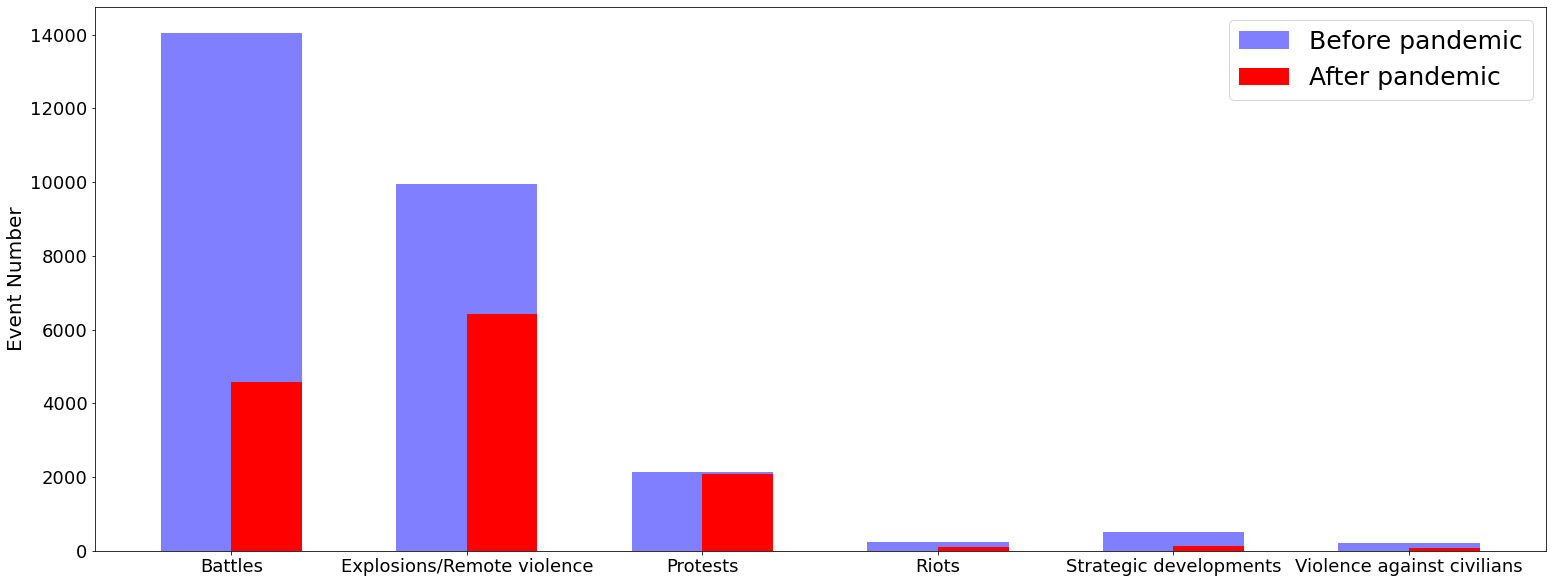

In [149]:
plt.figure(figsize=(26,10))
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)


width = 0.6

event_happened_bef = diff_type_bef
event_happened_aft = diff_type_aft
indices = np.arange(len(event_happened_bef))
LABELS = unique_event_type_total

plt.bar(indices, event_happened_bef, width=width, 
        color='b', alpha=0.5, label='Before pandemic')
plt.bar([i+0.25*width for i in indices], event_happened_aft, 
        width=0.5*width, color='r', label='After pandemic')
plt.xticks(indices, LABELS)
plt.ylabel('Event Number', fontsize = 20)

plt.legend(fontsize = 25)
plt.show()

covid_date=Timestamp('2019-11-17 00:00:00')


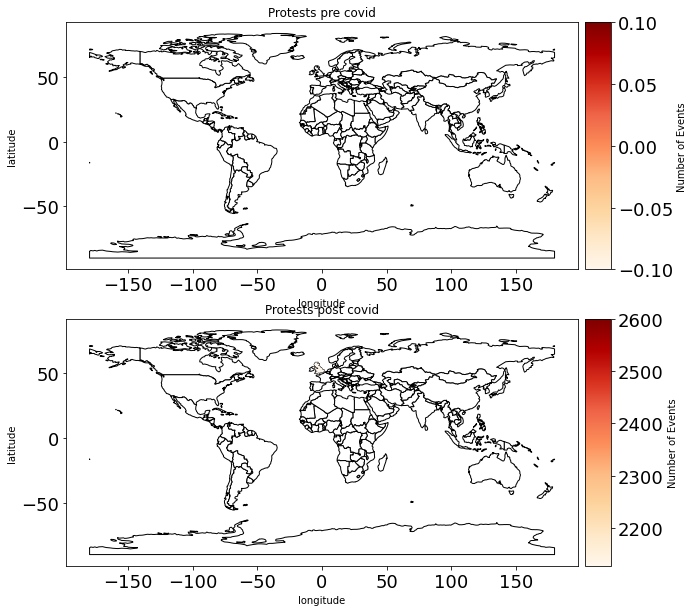

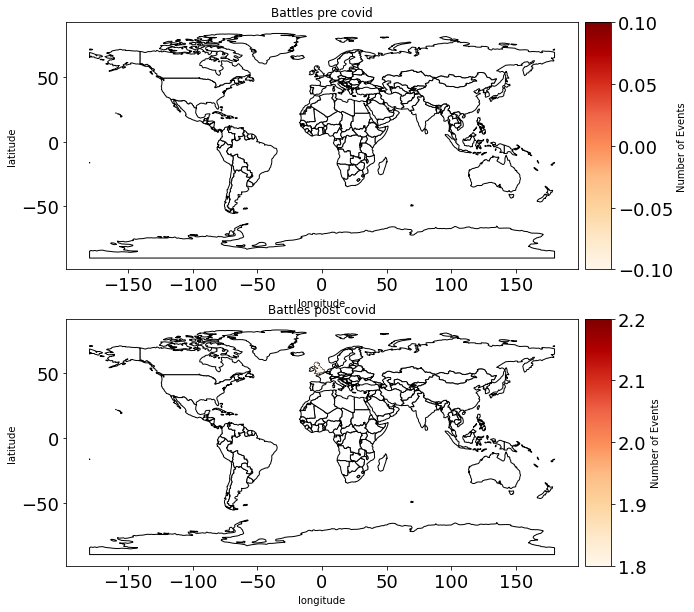

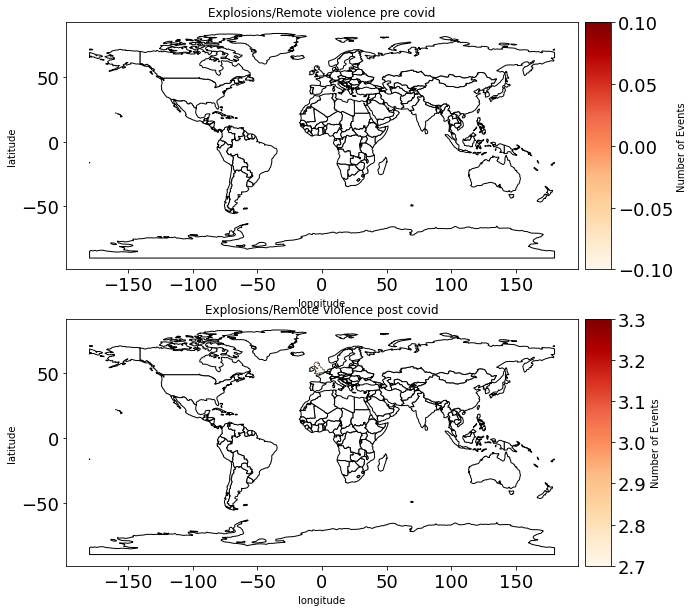

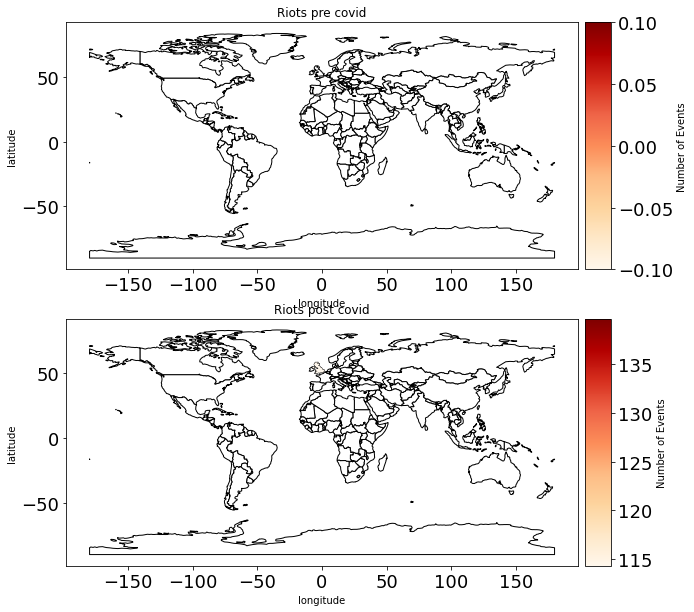

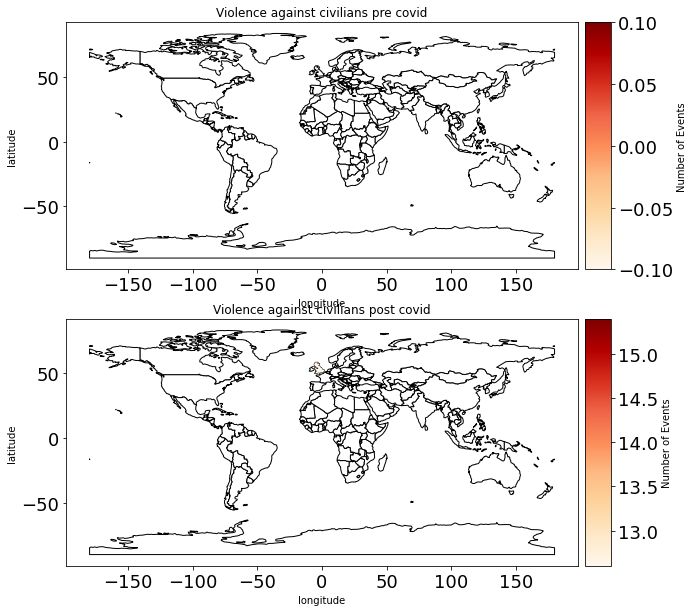

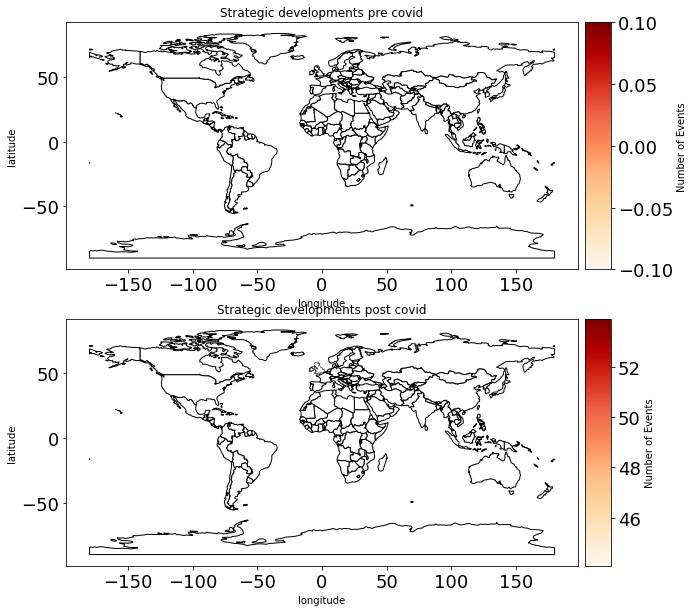

In [137]:
covid_date=pd.to_datetime("17 November 2019",infer_datetime_format=True)
print(f"{covid_date=}")

def addMapToAx(ax):
    """
    Plot events on a map
    Parameters:
        ax
    Returns:
    """
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    base = world.plot(ax=ax,color='white', edgecolor='black')
    ax.set_aspect('equal')
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

    return world

def setNumEvents(world,df):
    num_event_arr = np.zeros(len(world))
    for iso_num,iso_country in enumerate(world.iso_a3.values):
        iso_selection_bool = df.iso3.values == iso_country
        selected_rows = df[iso_selection_bool]
        num_event_arr[iso_num] = len(selected_rows)
    num_event_arr[num_event_arr==0] = np.nan
    world['num_events'] = num_event_arr

if __name__=="__main__":
    df=pd.read_csv(file_dir+"conflict_data_acled_2018_2021.csv")
    df['event_date']=pd.to_datetime(df['event_date'],infer_datetime_format=True)
    event_types=df['event_type'].unique()

    for event in event_types:
        fig,axs=plt.subplots(2,1,figsize=[20,10])
        for ii,ax in enumerate(axs):
            world=addMapToAx(ax)
            filter_event_df=df[(df['event_type']==event)&(df['country']=='United Kingdom')]
            if ii==0:
                filter_event_df=filter_event_df[filter_event_df['event_date']<=covid_date]
                ax.set_title(f"{event} pre covid")
            else:
                filter_event_df=filter_event_df[filter_event_df['event_date']>covid_date]
                ax.set_title(f"{event} post covid")
            #print(world)
            setNumEvents(world,filter_event_df)
            # filter_event_df.plot.scatter(x='longitude',y='latitude',ax=ax)
            # ax.hexbin(filter_event_df['longitude'],filter_event_df['latitude'],
            #           bins='log',mincnt=100,gridsize=50)
            # fig.colorbar(c)
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            world.plot(column='num_events',ax=ax, legend=True,cmap="OrRd",
                       cax=cax,legend_kwds={'label': "Number of Events"})
        #fig.savefig(rf"plots/{event.replace('/','_')}_count.png",dpi=300,
        #            bbox_inches="tight")